In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import arviz as az
import graphviz
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 42
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-viridish")

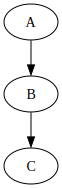

In [3]:
f = graphviz.Digraph()
f.edge("A", "B")
f.edge("B", "C")
f

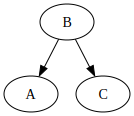

In [4]:
f = graphviz.Digraph()
f.edge("B", "A")
f.edge("B", "C")
f

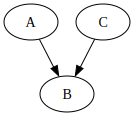

In [5]:
f = graphviz.Digraph()
f.edge("A", "B")
f.edge("C", "B")
f

In [6]:
c = np.random.rand(100)

In [7]:
x = c + .1 * np.random.rand(100)
y = c + .3 * np.random.rand(100)

In [8]:
coef, p_val = stats.pearsonr(x, y)
print(coef)

0.9568715759737556


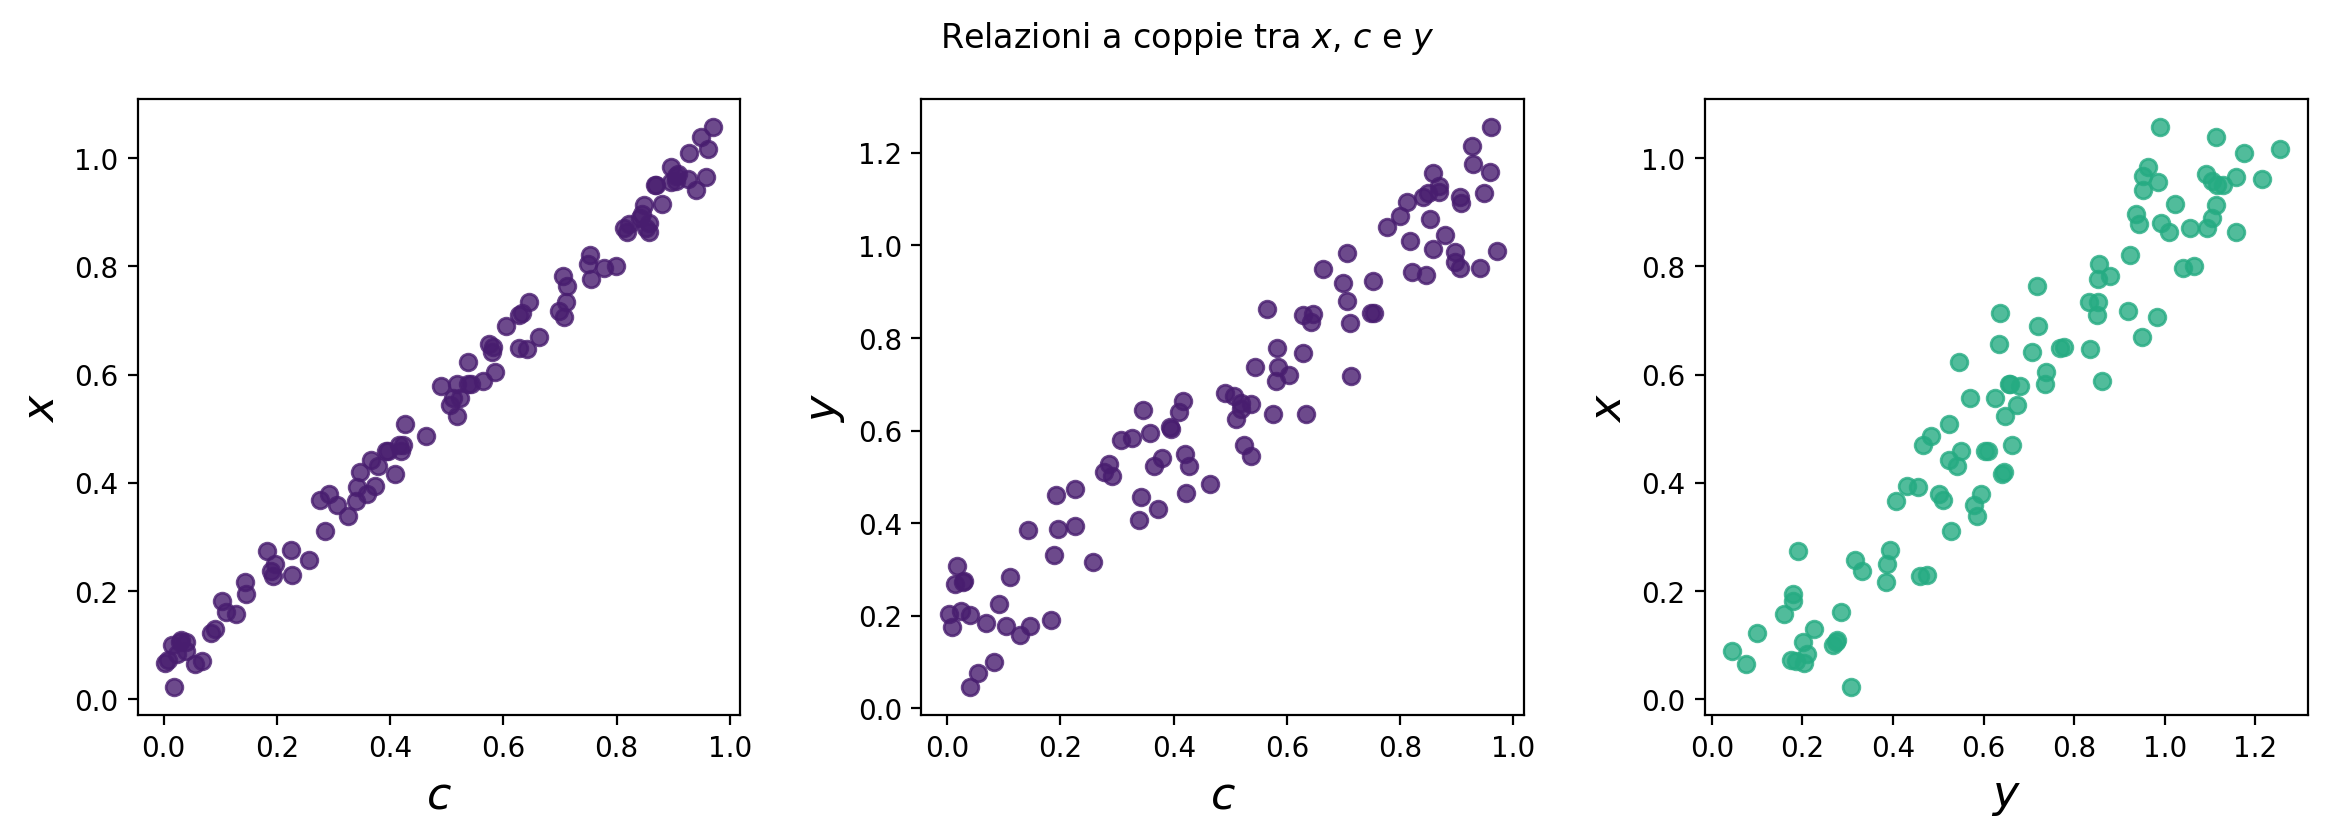

In [9]:
# Il codice è tratto da A. Molak (2023) "Causal Inference and Discovery in Python".

COLORS = ["C0", "C2"]

variables = {"x": x, "c": c, "y": y}

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for i, (var_1, var_2) in enumerate([("c", "x"), ("c", "y"), ("y", "x")]):
    color = COLORS[1]

    if "c" in [var_1, var_2]:
        color = COLORS[0]

    ax = axes[i]
    ax.scatter(variables[var_1], variables[var_2], alpha=0.8, color=color)

    ax.set_xlabel(f"${var_1}$", fontsize=16)
    ax.set_ylabel(f"${var_2}$", fontsize=16)

plt.suptitle("Relazioni a coppie tra $x$, $c$ e $y$")
plt.subplots_adjust(wspace=0.3)
plt.show()


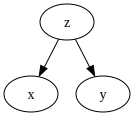

In [10]:
f = graphviz.Digraph()
f.edge("z", "x")
f.edge("z", "y")
f

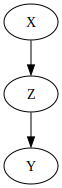

In [11]:
p = graphviz.Digraph()
p.edge('X','Z')
p.edge('Z','Y')
p

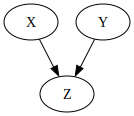

In [12]:
c = graphviz.Digraph()
c.edge('X','Z')
c.edge('Y','Z')
c

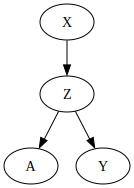

In [13]:
d = graphviz.Digraph()
d.edge('X','Z')
d.edge('Z','A')
d.edge('Z','Y')
d

In [14]:
stats.spearmanr([1, 2, 3, 4, 5], [5, 6, 7, 8, 7])

SignificanceResult(statistic=0.8207826816681233, pvalue=0.08858700531354381)

In [15]:
datasaurus_data = pd.read_csv("../data/datasaurus.csv")
datasaurus_data.groupby("dataset").agg(
    {"x": ["count", "mean", "std"], "y": ["count", "mean", "std"]}
)

x                           y                      
           count       mean        std count       mean        std
dataset                                                           
away         142  54.266100  16.769825   142  47.834721  26.939743
bullseye     142  54.268730  16.769239   142  47.830823  26.935727
circle       142  54.267320  16.760013   142  47.837717  26.930036
dino         142  54.263273  16.765142   142  47.832253  26.935403
dots         142  54.260303  16.767735   142  47.839829  26.930192
h_lines      142  54.261442  16.765898   142  47.830252  26.939876
high_lines   142  54.268805  16.766704   142  47.835450  26.939998
slant_down   142  54.267849  16.766759   142  47.835896  26.936105
slant_up     142  54.265882  16.768853   142  47.831496  26.938608
star         142  54.267341  16.768959   142  47.839545  26.930275
v_lines      142  54.269927  16.769959   142  47.836988  26.937684
wide_lines   142  54.266916  16.770000   142  47.831602  26.937902
x_shape      142  54.260150  16.769958   142  47.839717  26.930002

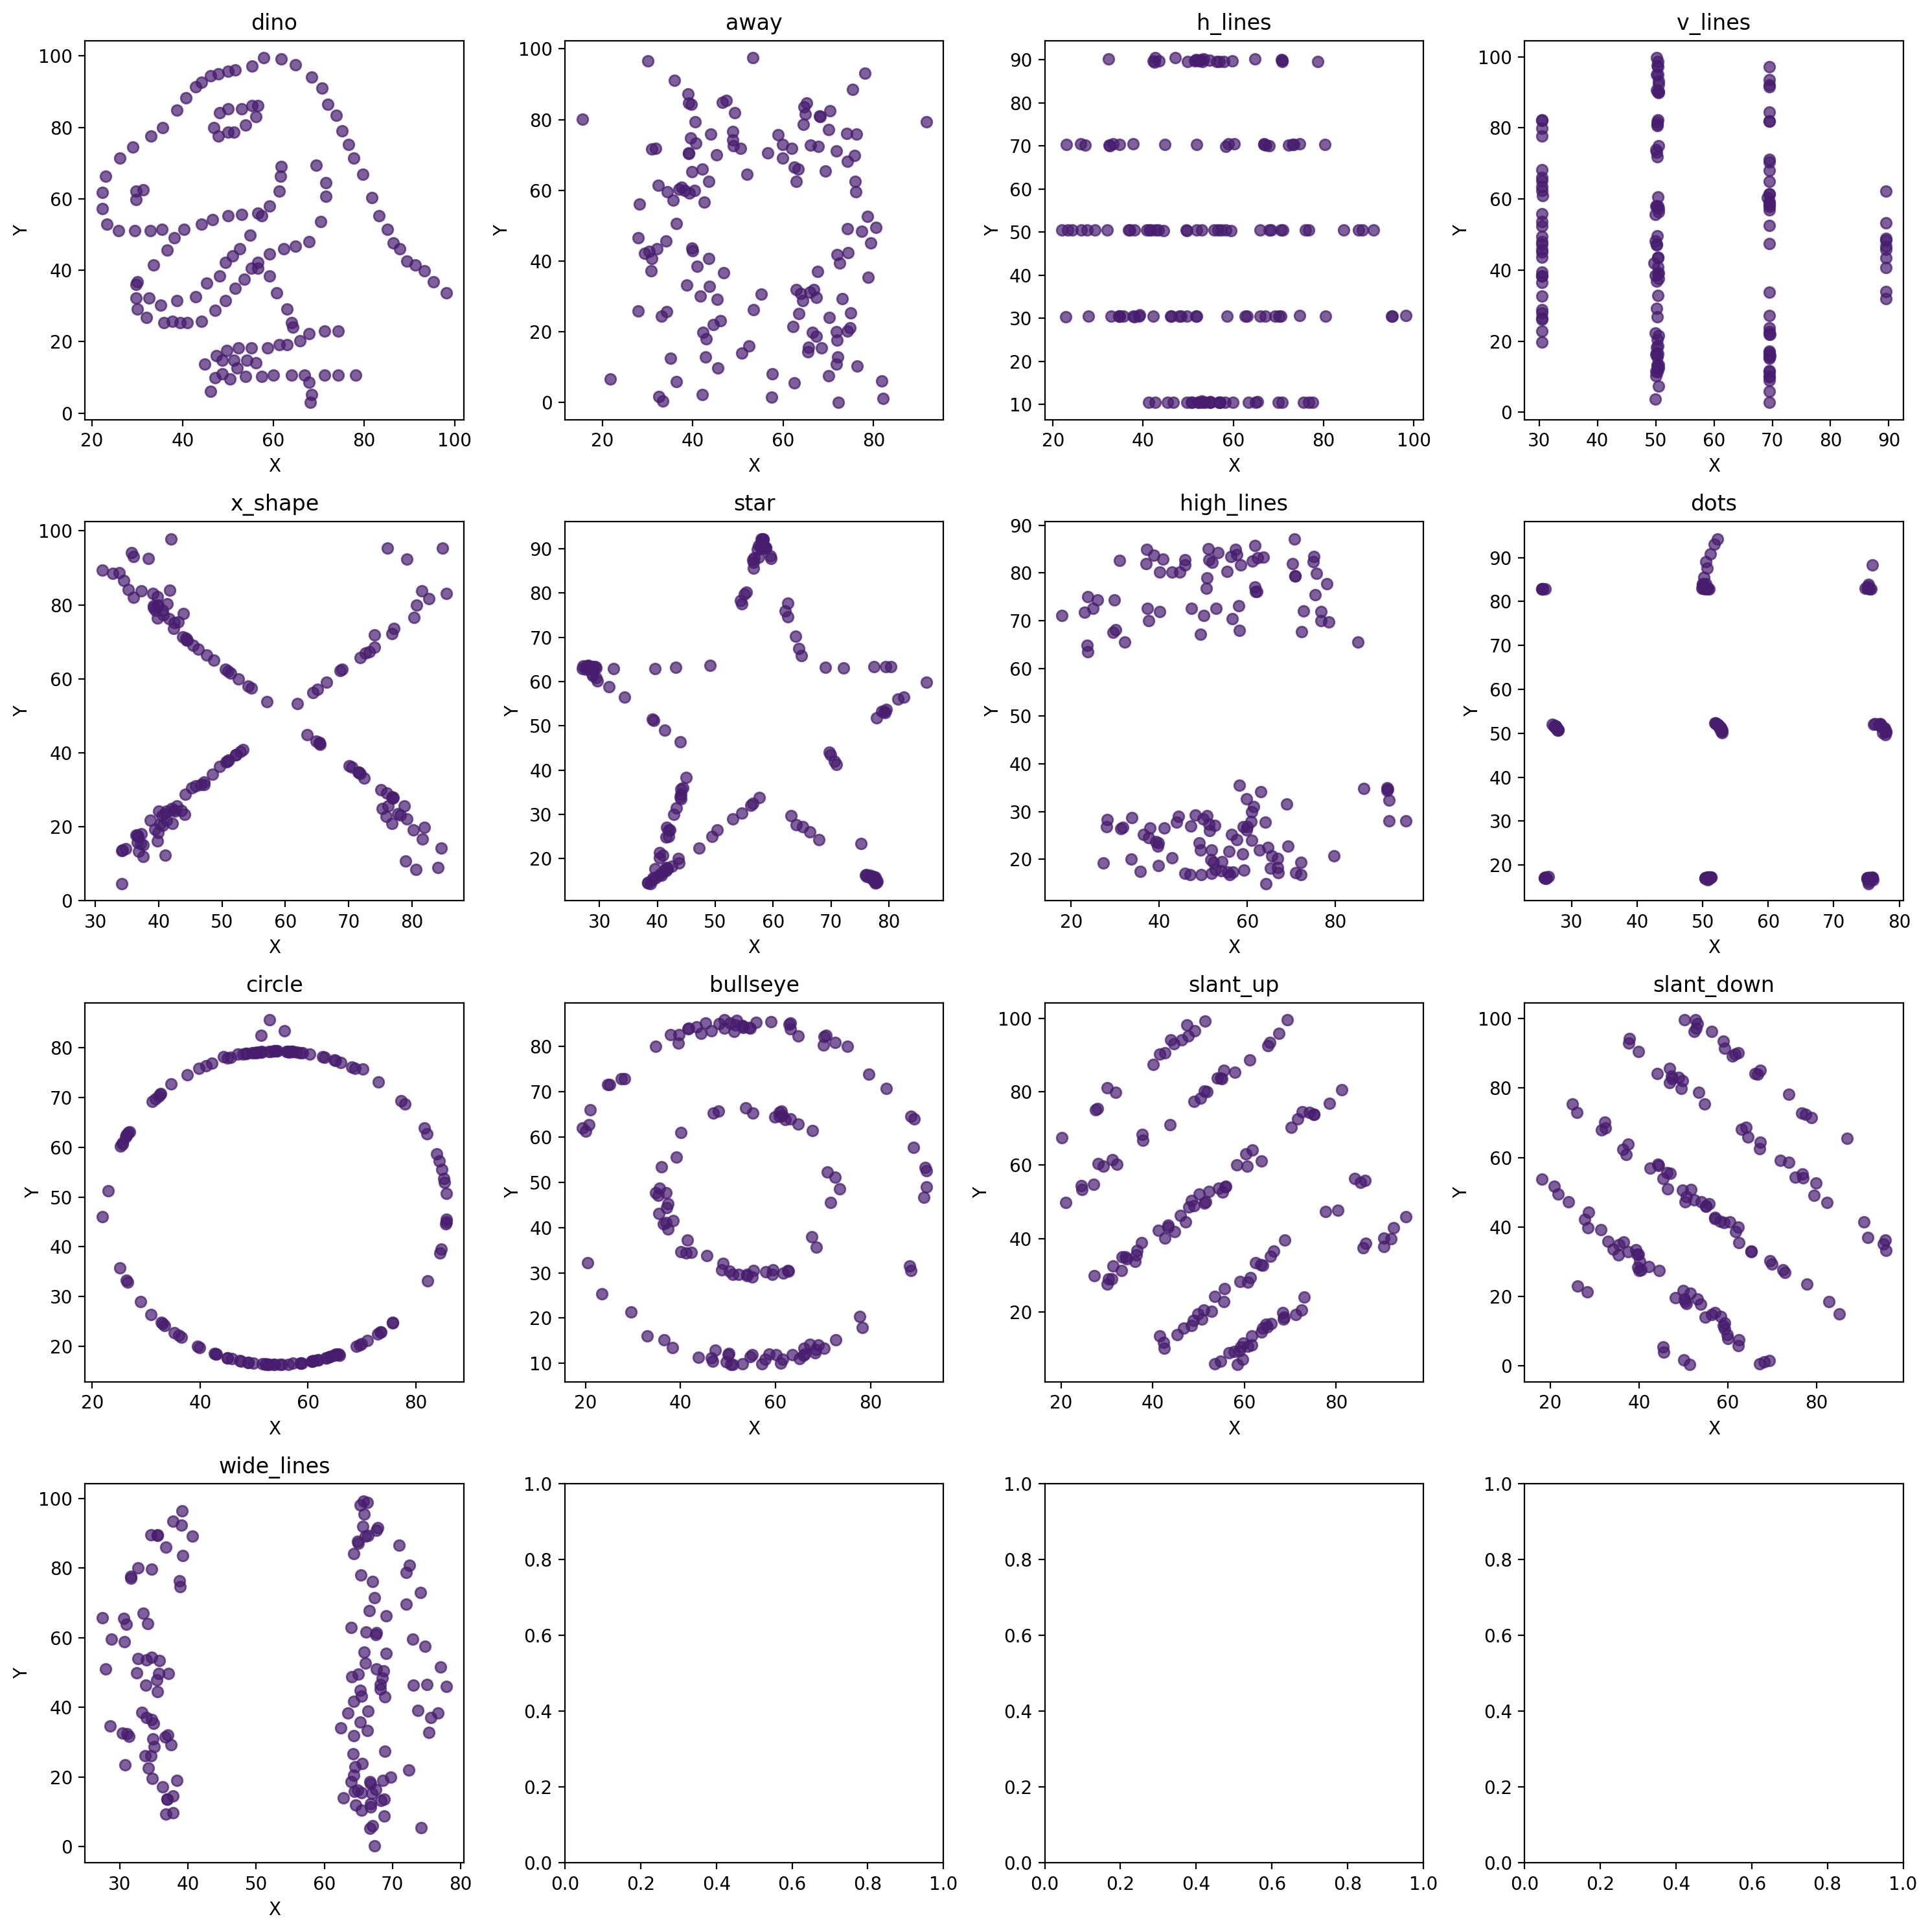

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
datasets = datasaurus_data["dataset"].unique()

for i, dataset in enumerate(datasets):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    subset = datasaurus_data[datasaurus_data["dataset"] == dataset]
    ax.scatter(subset["x"], subset["y"], alpha=0.7)
    ax.set_title(dataset)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.tight_layout()
plt.show()

In [17]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Thu Sep 21 2023

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.15.0

scipy     : 1.10.1
pandas    : 1.5.3
graphviz  : 0.20.1
matplotlib: 3.7.1
arviz     : 0.15.1
numpy     : 1.23.5
seaborn   : 0.12.2

Watermark: 2.4.3

